# FRED Examples

In [1]:
# Import the pandas library as pd
import pandas as pd

# Import the plotting library matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.style.use('classic')
%matplotlib inline

## Example: M2 Money Stock

The monetary aggregate M2 has FRED series ID `M2` and is available here: https://fred.stlouisfed.org/series/M2. To find the data in plaintext, under "Observation:", click "(+more)" and then in the drop-down menu, click "View All". You will be taken to a page that has the data. The URL is for the data is: https://fred.stlouisfed.org/data/M2.txt. 

Notice that the data URL has the form: `https://fred.stlouisfed.org/data/SERIESID.txt`, where `SERIESID` in this case is `M2`.

Notice that there are 19 lines of text *before* the line starting with "DATE". That means you need to tell Pandas to skip the first 19 rows of the text when importing.

In [2]:
# Download M2 data
m2 = pd.read_csv('https://fred.stlouisfed.org/data/M2.txt',skiprows=19,sep='\s+',index_col=0,parse_dates = True)

# First 5 rows of m2
m2.head()

,VALUE
DATE,
1980-11-03,1591.4
1980-11-10,1592.9
1980-11-17,1596.3
1980-11-24,1597.2
1980-12-01,1596.1


Note the the imported data are a DataFrame with a column called `'VALUE'`. It will be convenient later if we go ahead and extract the column as a Pandas Series and set `m2` equal to that.

In [3]:
# set m2 equal to 'VALUE' column of m2
m2 = m2['VALUE']

# First 5 rows of m2
m2.head()

DATE
1980-11-03    1591.4
1980-11-10    1592.9
1980-11-17    1596.3
1980-11-24    1597.2
1980-12-01    1596.1
Name: VALUE, dtype: float64

## Plot most recent year of M2 data

You can see from FRED that the data are at a weekly observation frequency. So we plot the final 52 elements of `m2`.

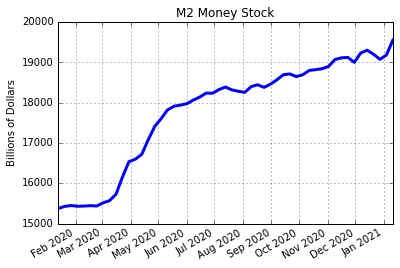

In [4]:
# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Plot
ax.plot(m2[-53:],'-',lw=3)

# Add title and y-axis label
ax.set_title('M2 Money Stock')
ax.set_ylabel('Billions of Dollars')

# Auto-rotate the x-axis labels
fig.autofmt_xdate()

ax.grid()

# Save the figure as a png file. bbox_inches = 'tight' reduces whitespace around the figure
fig.savefig('m2.png',dpi = 120,bbox_inches='tight')

Evidently the money supply in the US has expanded considerably in the past year.

## Plot most recent year of M2 growth

Recall that the growth rate of a quantity $X_t$ is:
\begin{align}
\text{growth rate of }X_t & = \frac{X_t - X_{t-1}}{X_{t-1}}
\end{align}

You can use the `.shift()` method for Pandas objects to create the lagged ($t-1$) value of $X$.

In [5]:
# Create legged M2
m2_lag = m2.shift(1)

m2_lag.head()

DATE
1980-11-03       NaN
1980-11-10    1591.4
1980-11-17    1592.9
1980-11-24    1596.3
1980-12-01    1597.2
Name: VALUE, dtype: float64

The data have been shifted forward one time increment and so there is a missing value for the first date.

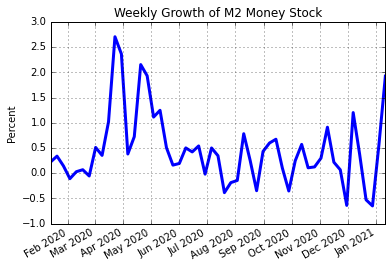

In [6]:
# Create growth rate of m2
m2_growth = m2/m2_lag - 1

# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Plot. Multiply growth by 100 to get units in percent
ax.plot(100*m2_growth[-53:],'-',lw=3)

# Add title and y-axis label
ax.set_title('Weekly Growth of M2 Money Stock')
ax.set_ylabel('Percent')

# Auto-rotate the x-axis labels
fig.autofmt_xdate()

ax.grid()

# Save the figure as a png file. bbox_inches = 'tight' reduces whitespace around the figure
fig.savefig('m2_growth.png',dpi = 120,bbox_inches='tight')

Maybe you'd like a bar chart instead?

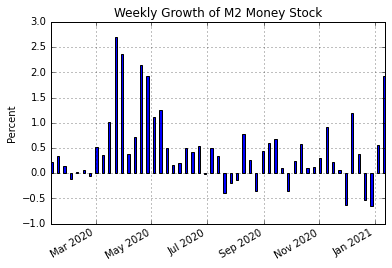

In [7]:
# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Plot. Multiply growth by 100 to get units in percent.
ax.bar(m2_growth[-53:].index,100*m2_growth[-53:],width=2.5)
fig.autofmt_xdate()

# Add title and y-axis label
ax.set_title('Weekly Growth of M2 Money Stock')
ax.set_ylabel('Percent')

# Auto-rotate the x-axis labels
fig.autofmt_xdate()

ax.grid()

# Save the figure as a png file. bbox_inches = 'tight' reduces whitespace around the figure
fig.savefig('m2_growth_bar.png',dpi = 120,bbox_inches='tight')

## Compute growth rate of M2 over previous year

In [8]:
m2_growth_one_year = 100*(m2.iloc[-1] / m2.iloc[-53]- 1)

print('M2 growth over previous year:',round(m2_growth_one_year,5),'%')

M2 growth over previous year: 27.17106 %


# Example: Consumer Price Index

The consumer price index is a measure of the price level. "Consumer Price Index for All Urban Consumers: All Items in U.S. City Average" has FRED series ID `CPIAUCSL` and is available here: https://fred.stlouisfed.org/series/CPIAUCSL.

Notice that here there are now 54 lines of text *before* the line starting with "DATE". That means you now need to tell Pandas to skip the first 54 rows of the text when importing.

In [13]:
# Download CPI data
cpi = pd.read_csv('https://fred.stlouisfed.org/data/CPIAUCSL.txt',skiprows=54,sep='\s+',index_col=0,parse_dates = True)

# set cpi equal to 'VALUE' column of cpi
cpi = cpi['VALUE']

# First 5 rows of CPI
cpi.head()

DATE
1947-01-01    21.48
1947-02-01    21.62
1947-03-01    22.00
1947-04-01    22.00
1947-05-01    21.95
Name: VALUE, dtype: float64

## Plot most recent 2 years of CPI data

You can see from FRED that the data are at a monthly observation frequency. So we plot the final 24 elements of `cpi`.

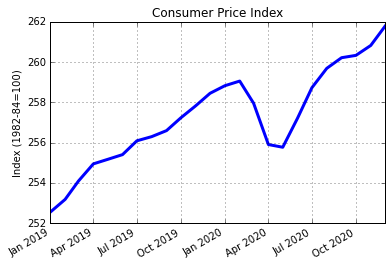

In [10]:
# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Plot
ax.plot(cpi[-24:],'-',lw=3)

# Add title and y-axis label
ax.set_title('Consumer Price Index')
ax.set_ylabel('Index (1982-84=100)')

# Auto-rotate the x-axis labels
fig.autofmt_xdate()

ax.grid()

# Save the figure as a png file. bbox_inches = 'tight' reduces whitespace around the figure
fig.savefig('cpi.png',dpi = 120,bbox_inches='tight')

Look at the big drop in consumer prices in February, March, and April that was followed by fairly rapid recovery.

## Monthly CPI inflation over previous 2 years

We can obtain a measure of inflation as the growth rate of the CPI.

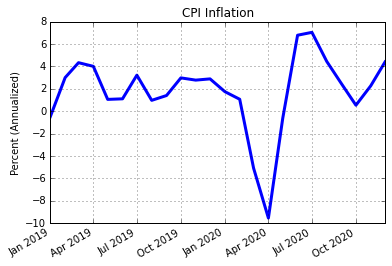

In [11]:
# Compute CPI inflation
cpi_inflation = cpi/cpi.shift(1)-1

# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Plot
ax.plot(100*12*cpi_inflation[-24:],'-',lw=3)

# Add title and y-axis label
ax.set_title('CPI Inflation')
ax.set_ylabel('Percent (Annualized)')

# Auto-rotate the x-axis labels
fig.autofmt_xdate()

ax.grid()

# Save the figure as a png file. bbox_inches = 'tight' reduces whitespace around the figure
fig.savefig('cpi_inflation.png',dpi = 120,bbox_inches='tight')

Notice that the data are multiplied by 100 and 12 so that the units are annualized percent change. For example, in April 2020, the CPI declined by 9.5% on an annual basis. That means that the CPI actually only fell by 0.8%, but if that same percent change were to persist for a full year, then the CPI would end up falling by 9.5%. It is a convention to annualize inflation and interest data to standardize the units.

## Average CPI inflation over different subsamples

Suppose you want to compare the average rate of CPI inflation over the past year with that over the past 2 years, 5 years, and 50 years. Then use the formula:

\begin{align}
\text{CPI}_T & = (1 + \pi)^T \text{CPI}_0
\end{align}

to compute 

\begin{align}
\pi & = \left(\frac{\text{CPI}_T}{\text{CPI}_0}\right)^{1/T} - 1
\end{align}

In [12]:
# Compute and print average inflation rates
print('CPI inflation over previous year:     ',round(100*(cpi.iloc[-1]/cpi.iloc[-1-1*12]-1),5),'%')
print('CPI inflation over previous 2 years:  ',round(100*((cpi.iloc[-1]/cpi.iloc[-1-2*12])**(1/2)-1),5),'%')
print('CPI inflation over previous 10 years: ',round(100*((cpi.iloc[-1]/cpi.iloc[-1-10*12])**(1/10)-1),5),'%')
print('CPI inflation over previous 50 years: ',round(100*((cpi.iloc[-1]/cpi.iloc[-1-50*12])**(1/50)-1),5),'%')
print('CPI inflation over previous all years:',round(100*((cpi.iloc[-1]/cpi.iloc[0])**(1/(len(cpi)-1)*12)-1),5),'%')

CPI inflation over previous year:      1.28887 %
CPI inflation over previous 2 years:   1.78924 %
CPI inflation over previous 10 years:  1.73197 %
CPI inflation over previous 50 years:  3.8391 %
CPI inflation over previous all years: 3.44054 %


See how much lower the average inflation rate over the last year has been compared to the larger subsamples?